<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Yahoo Finance - Stock Data Project
</h2>

<h3 align="center">
    Name: Jian Jin Chen
</h3>


### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "Yahoo Finance - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

You can now start working on the project. :)

Google Colab QuickStart:
- Google Colab is a Python Notebook environment built by Google that's free for all.
- Colab Notebooks are made up of cells; cells can be either *text* or *code* cells. You can click the +code or +text button at the top of the Notebook to create a new cell.
- Text cells use a format called [Markdown](https://www.markdownguide.org/getting-started/). Knowledge of Markdown is not required for this project. However, if you'd like to learn more, [check out this Cheatsheet!](https://www.markdownguide.org/cheat-sheet/)
- Python code is executed in *code* cells. When you want to run your code, hover your cursor over the square brackets in the top left corner of your code cell. You'll notice a play button pop up! (▶) Click the play button to run the code in that cell. Code cells run one at a time.
- The memory shared across your notebook is called the *Runtime*. You can think of a Runtime as a "code session" where everything you create and execute is temporarily stored.
- Runtimes will persist for a short period of time, so you are safe if you need to refresh the page, but Google will shutdown a Runtime after enough time has passed. Everything that you have printed out will remain within your Notebook even if the runtime is disconnected.

If this is your first time using Google Colab, we highly recommend reviewing the [NSDC's *Using Google Colab Guide*](https://nebigdatahub.org/wp-content/uploads/2023/04/NSDC-Data-Science-Projects-Introduction-Using-Google-Colab.pdf) before continuing. For a more comprehensive guide, see [Colab's *Welcome To Colaboratory* walkthrough.](https://colab.research.google.com/github/prites18/NoteNote/blob/master/Welcome_To_Colaboratory.ipynb)

## Milestone 1: Data Retrieval and Pre-processing


GOAL: Set up your environment, install necessary packages, retrieve stock data, and perform initial data cleaning tasks.

**Step 1:** Install and Import Libraries

Before diving into data analysis, we need to set up our Python environment with the necessary libraries:

In [ ]:
#TODO: Import libraries
import pandas as pd  # For data manipulation and analysis
import yfinance as yf  # For downloading historical stock data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**Step 2:** Retrieve Historical Stock Data

Using yfinance, we'll [download historical stock data](https://pypi.org/project/yfinance/) for Apple Inc. (AAPL) from January 1, 2010, to December 31, 2022:

In [ ]:
#TODO: Download the data
data = yf.download('AAPL', start='2010-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


**Step 3:** Clean the Data

We'll remove any missing values and duplicates to ensure the quality of our data for analysis:

In [ ]:
#TODO: Remove Missing Values and duplicates using a drop function
data.drop_duplicates(inplace=True)
data.drop_duplicates(inplace=True)

## Milestone 2: Exploratory Data Analysis (EDA)

GOAL: Perform exploratory data analysis to understand stock price trends and compute basic statistical measures.

**Step 1:** Visualize Stock Prices

Create a plot to visualize the stock's closing prices and observe trends over time:

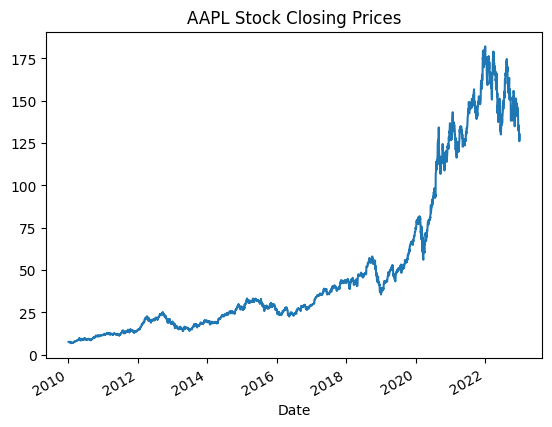

In [ ]:
#TODOL Visualize AAPL Stock Closing Prices
data['Close'].plot(title='AAPL Stock Closing Prices')
plt.show()

**TO DO:** What is one thing you observed in the visualization above?
>*  I notce that from 2010 to 2020 the closing prices rose slightly but afterward it went up massively then went back down around 2022.


**Step 2:** Statistical Summary

Generate a statistical summary of the stock data to get insights into its central tendencies and variability. Need a refresher on descriptive statistics? [Check out this NSDC Flashcard Video Series!](https://youtube.com/playlist?list=PLNs9ZO9jGtUBQfxw7YAmtZJPRiEpnwaNc&feature=shared)

In [ ]:
#TODO: Use the describe() function for the data
print(data.describe())


              Open         High          Low        Close    Adj Close  \
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean     51.297746    51.869747    50.731996    51.321186    49.008774   
std      47.328490    47.938843    46.732224    47.357062    47.378368   
min       6.870357     7.000000     6.794643     6.858929     5.792195   
25%      18.966697    19.121697    18.780179    18.967589    16.471393   
50%      29.756250    29.981250    29.561250    29.815000    27.131197   
75%      56.983748    57.309999    56.469999    56.777499    54.441426   
max     182.630005   182.940002   179.119995   182.009995   179.273590   

             Volume  
count  3.272000e+03  
mean   2.562707e+08  
std    2.225648e+08  
min    3.519590e+07  
25%    1.023541e+08  
50%    1.666698e+08  
75%    3.456643e+08  
max    1.880998e+09  


## Milestone 3: Moving Averages and Basic Technical Indicators

GOAL: Calculate [simple moving averages](https://investopedia.com/terms/m/movingaverage.asp) (SMAs) to understand trends and prepare for strategy development.

**Step 1:** Calculate SMAs

Calculate 10-day and 50-day simple moving averages for the stock:

In [ ]:
data['MA10'] = data['Close'].rolling(window=10).mean()  # 10-day SMA
#TODO: Calculate the 50-day SMA
data['MA50'] = data['Close'].rolling(window=50).mean() # 50-day SMA


**Step 2:** Plot SMAs

Plot the calculated SMAs along with the closing price to visualize the trends:

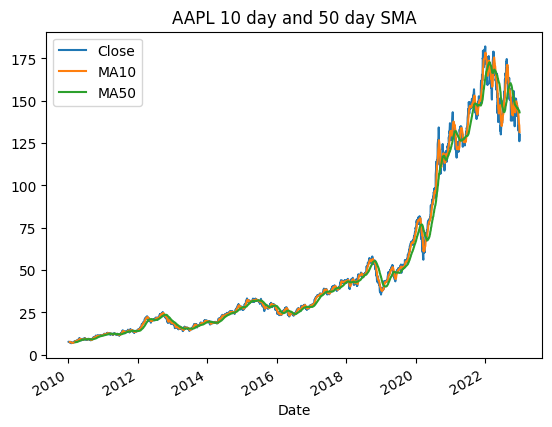

In [ ]:
#TODO: Plot the AAPL Stock Prices and Moving Averages
data[['Close', 'MA10', 'MA50']].plot(title='AAPL 10 day and 50 day SMA')
plt.legend()
plt.show()


**TO DO:** What is one thing you observed in the visualization above?
>*  The closing price, 10 day SMA and 50 day SMA seems very correlated to each other.


## Milestone 4: Implementing a Moving Average Crossover Strategy

GOAL: Develop a [simple moving average crossover trading strategy](https://investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp) to generate buy and sell signals.

**Step 1:** Define the Trading Signals

First, let's generate trading signals based on the crossover of the 10-day and 50-day SMAs:

In [ ]:
#TODO: Generate trading signals
data['Signal'] = np.where(data['MA10'] > data['MA50'], 1, 0)
data['Position'] = data['Signal'].diff()


**Step 2:** Visualize the Strategy

Illustrate the trading signals on a plot to identify where the buy and sell actions would occur:

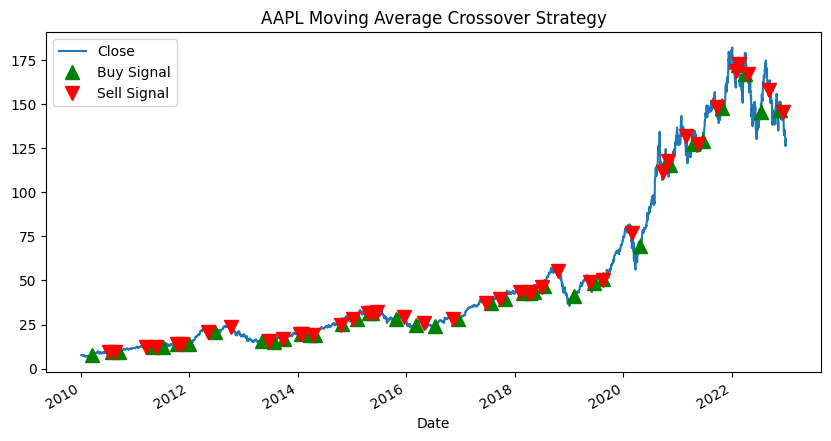

In [ ]:
#TODO: Create a visualization
plt.figure(figsize=(10,5))
data['Close'].plot(title='AAPL Moving Average Crossover Strategy')
plt.plot(data[data['Position'] == 1].index, data['MA10'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['MA50'][data['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.legend()
plt.show()


**TO DO:** How would you explain the above visualization to someone who does not have a strong analytical background? What is this visualization showing us?
>*   The visual is showing us times where we should buy and sell AAPL stock.


## Milestone 5: Backtesting the Strategy

GOAL: Simulate the execution of the trading strategy using historical data to evaluate its hypothetical performance.

**Step 1:** Prepare Data for [Backtesting](https://backtrader.com)

Create a new DataFrame to track the positions and portfolio value over time based on the signals generated:

In [ ]:
#TODO: Initialize the portfolio DataFrame with the positions
portfolio = pd.DataFrame(index=data.index)
portfolio['Holdings'] = data['Position'].cumsum() * data['Adj Close']


**Step 2:** Backtest and Calculate Portfolio Value

Calculate the total value of the portfolio over time, considering the initial capital and the holdings:

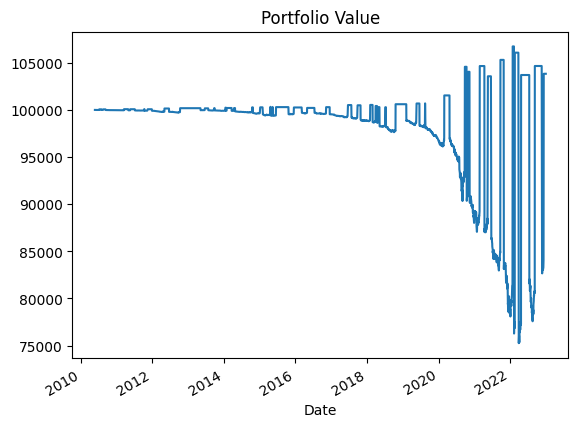

In [ ]:
#TODO: Calculate the total value
initial_capital = 100000  # Starting capital
portfolio['Cash'] = initial_capital - (portfolio['Holdings'].diff() * data['Close']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']

portfolio['Total'].plot(title='Portfolio Value')
plt.show()


## Milestone 6: Model Selection and Machine Learning Introduction
GOAL: Compare different machine learning models to predict future price movements or stock returns.

**Step 1:** Feature Engineering

Create features from historical price data that will be used as inputs for the machine learning models:

In [ ]:
#TODO: Create features
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()


**Step 2:** Train and Compare Models

Split the data into a training set and a testing set, train different models, and evaluate their performance. To learn more about machine learning models, [check out this resource.](https://scikit-learn.org/stable/index.html)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# TODO: Compute returns and moving averages
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
#TODO - Follow suit for MA50
data['MA50'] = data['Close'].rolling(window=50).mean()

# We drop the NaN values after the shifting operation to align the indices
data['Target'] = (data['Returns'].shift(-1) > 0).astype(int)
data.dropna(inplace=True)  # Make sure to drop NaN values to align 'X' and 'y'

# TODO: Prepare the features (X) and target (y)
X = data[['Returns', 'MA10', 'MA50']]
y = data['Target']

# TODO: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
# TODO - Fit the model
model.fit(X_train, y_train)

# TODO: Make predictions and evaluate the model
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 49.63%


## Milestone 7: Performance Metrics and Model Evaluation
GOAL: Evaluate the trained machine learning model using performance metrics.

**Step 1:** Calculate Performance Metrics

Use a [confusion matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) and classification report to evaluate model predictions. To learn more about model evaluations, [check out this resource.](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# TODO: Predict on test set
predictions = model.predict(X_test)

# TODO: Calculate metrics
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
report = classification_report(y_test, predictions)
print(report)


[[213 245]
 [235 260]]
              precision    recall  f1-score   support

           0       0.48      0.47      0.47       458
           1       0.51      0.53      0.52       495

    accuracy                           0.50       953
   macro avg       0.50      0.50      0.50       953
weighted avg       0.50      0.50      0.50       953



## Milestone 8: Reporting and Visualization

GOAL: Develop visual reports and dashboards to represent the model's predictions and performance metrics effectively.

**Step 1:** Visualize the Confusion Matrix

Create a heatmap to display the confusion matrix for a clear visual representation of the model's performance. To learn more about heatmaps, review [this interesting NSDC Flashcard Video!](https://youtu.be/MuHsSH590WY?feature=shared)



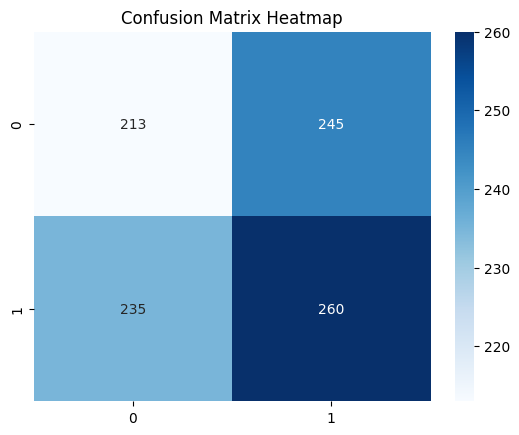

In [ ]:
#TODO: Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.show()


**Step 2:** Feature Importance Visualization

Plot the [importance of each feature](https://builtin.com/data-science/feature-importance) used by the model to understand their impact on the predictions:

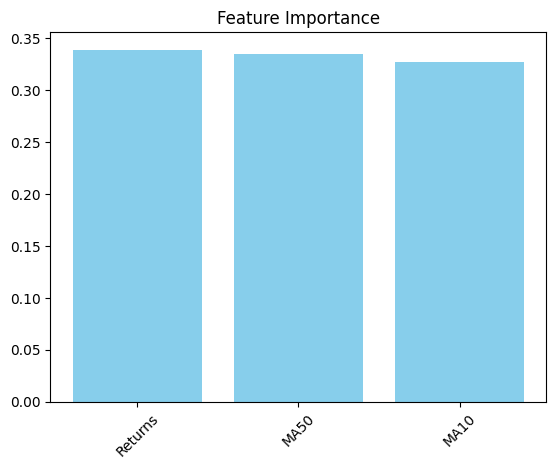

In [ ]:
#TODO: Graph the importance of each feature
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(X_train.shape[1]), importances[indices], color='skyblue')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.title('Feature Importance')
plt.show()


**TO DO:** Visualization aids in the interpretation of complex data and results, making it a crucial part of data science communication. What is something you've learned about this financial data after reviewing the visualizations you've created?
>*  Based on the visualization, the Returns, 50 day SMA, and the 10 day SMA have similar importance, meaning these indicators have similar predictive power. The similar predictive power means there may be redundancy when using these indicators together.

<h3 align = 'center' >
Thank you for completing the project!
</h3>

Please submit all materials to er3101@columbia.edu in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.